# Spot size
## Standard deviation
When considering substantially non-Gaussian beams, a lot of the typical metrics we use which are based on standard deviations can give misleading results.

For example, consider this beam at PENT:

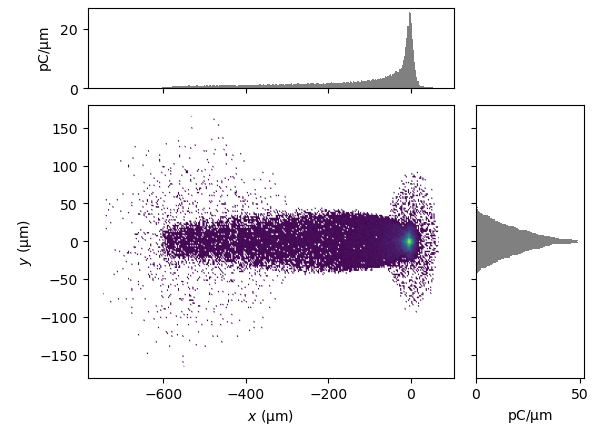

Due to the long tail, sigma_x is 171 um

## Full width half max
A common alternative is to take the FWHM:

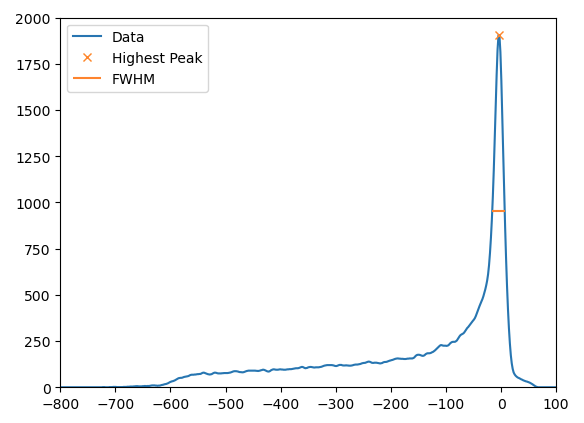

For the beam above, this yields a FWHM of 22.8 um. For a gaussian, sigma = FWHM / 2.355, giving an estimate for sigma of 9.7 um

Using a FHWM is slightly pesky because the bin size is a free variable. Also, as in this case, if the distribution is spiky, it may find a very small spike which is not representative of the overall distribution. Although one can define different contour lines at which to measure the width (i.e. not at the "half-max") I still don't like this method. It introduces another free variable and I don't think the contour level has an obviously useful meaning in general (although, for certain applications, it might be ideal).

## Gaussian fit
Similar issues to using FWHM with the detriment of being more expensive to calculate. Not discussed in detail here.

## Smallest interval
Instead, the method I propose to use is to find the smallest interval which contains some desired percent of the charge. This still has a free variable, but I think it's a more physically useful one. If you think roughly 70% of your beam is important for whatever your application is, use that value.

For the beam shown above, 10% of the charge is within 6 um, 70% within 234 um, and 90% within 471 um. 

Additionally, for Gaussian bunches, one can readily determine the standard deviation given the length of the interval and the contained percent using `erfinv`. One can abuse this though and find implied sigmas for non-Gaussians if that's useful. For the beam shown above, the implied sigma for 10% of the charge is 25 um while it's 113 um for 70% of the charge; these values fall between the true standard deviation and the FWHM-implied sigma.

# Emittance
## Ellipses
Let's extend this to the calculation of emittance. The typical way of doing this calculation again uses standard deviations, which can significantly overestimate the emittance for the "meaningful" part of the beam.

A common alternative is fitting an ellipse which contains some fraction of the charge. For a code like GPT, they find the average ellipse (i.e. defined by all the particles), find the normalized coordinates of the particles, then shrink/expand the average ellipse to encompass the desired number of particles. Provided the average ellipse is a good starting point, this is a fast and effective method. However, I found that for some of our beams, the average ellipse is not a good approximation.

An alternative is to use a numerical optimizer to find the smallest ellipse which contains the desired charge fraction. This involves 5 free parameters: major/minor axis, rotation angle, and x/y centroid. Solving this numerically is tractable but seemed clunky. See "2024-07-03 Ellipse fitting.ipynb" for an unpolished implementation

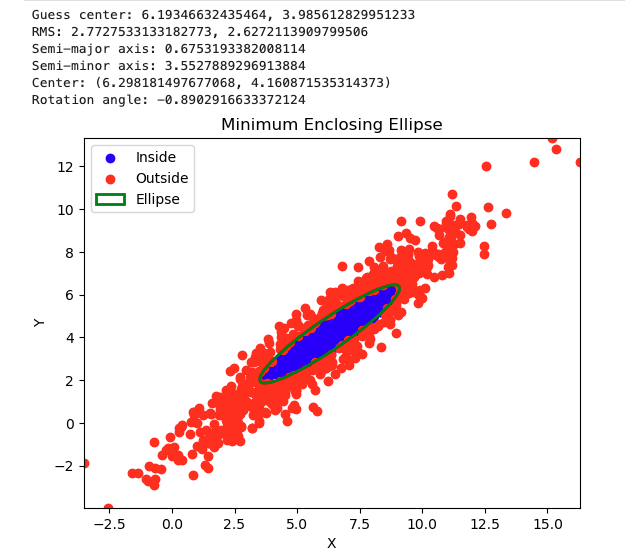

## Artificial emittance scans
My presently preferred approach uses the smallest-interval method from above in conjunction with an artificial emittance scan. 

For a Gaussian beam drifting a distance z, the spot size sigma is: np.sqrt(sigmax\*\*2 + 2 * z * rho * sigmax * sigmaxp + z\*\*2 * sigmaxp\*\*2)

To get the emittance, I pick a few z values, use the smallest-interval implied sigma, then use curve_fit to get the three free parameters and calculate emittance.

As with the spot size calculation, I like this approach because you can tune the amount of charge which you think "matters" for your application. As the contained fraction increases, the result will approach the pure standard deviation.

Here's an example of a pretty strongly non-Gaussian beam at MFFF, calculated for 70% charge:

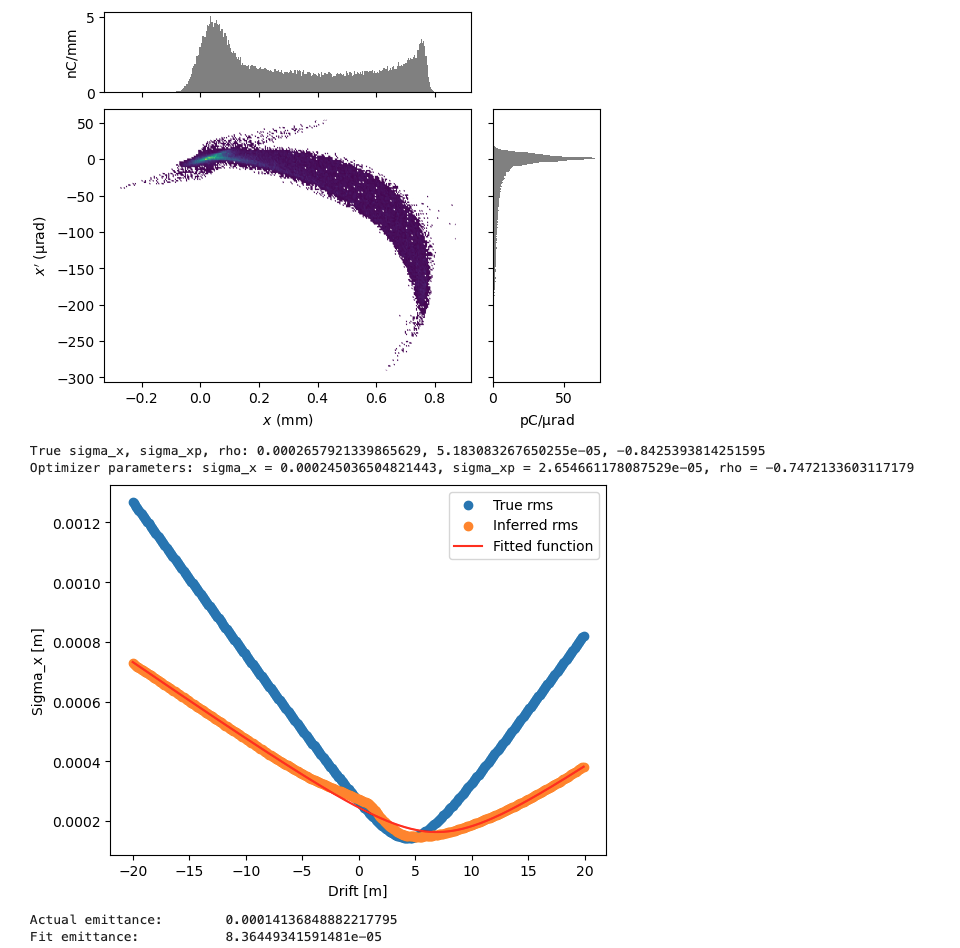

For other details, see "2024-07-01 RMS vs FWHM at PENT.ipynb"